In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import datetime
import seaborn as sns
import os
from dateutil.parser import parse

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
crypto_tweets = os.path.join("resources","coin_tweet_analysis_combined.csv")
crypto_tweets_df = pd.read_csv(crypto_tweets)

In [12]:
crypto_tweets_df.head()

,tweet number,symbol,date,coin_name,coin_price,compound_average,positive_average,neutral_average,negative_average
0,1,ADA,1/1/2017,cardano,0.0,0.011396,0.01392,0.96672,0.01936
1,2,ADA,1/2/2017,cardano,0.0,-0.017168,0.04000,0.92552,0.03448
2,3,ADA,1/3/2017,cardano,0.0,-0.000296,0.02192,0.93316,0.04484
3,4,ADA,1/4/2017,cardano,0.0,0.010848,0.03092,0.88676,0.04224
4,5,ADA,1/5/2017,cardano,0.0,0.066924,0.03568,0.94524,0.01900


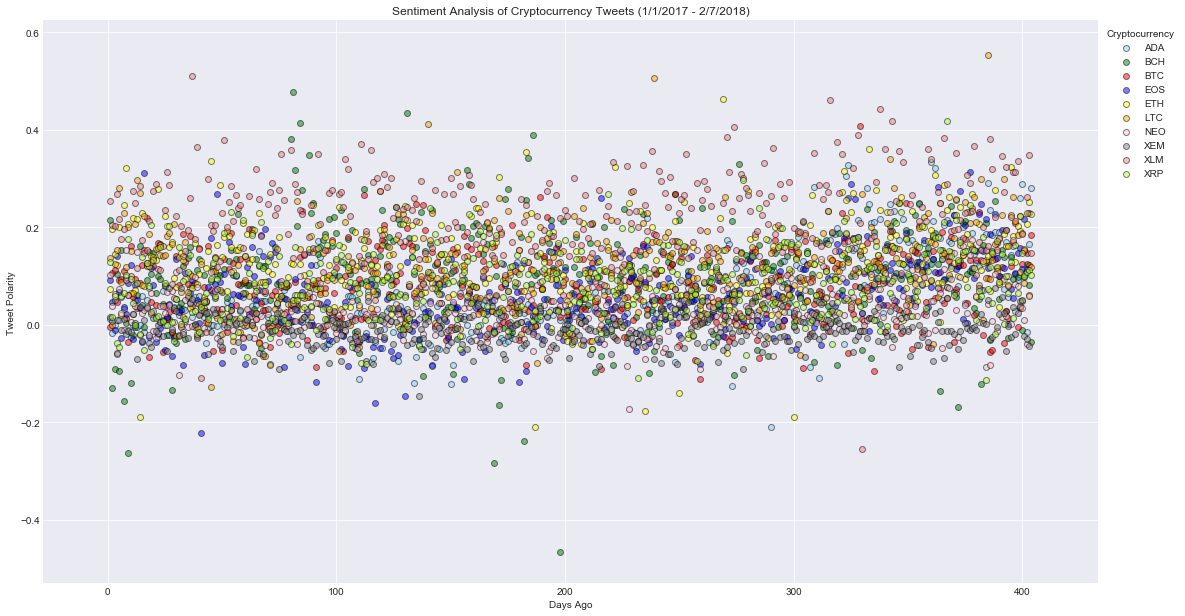

In [15]:
sns.set_style('darkgrid')
today_date = datetime.datetime.now().strftime('%m/%d/%y')
coin_type = crypto_tweets_df["symbol"].unique()
colors = ["lightskyblue", "green", "red", "blue", "yellow", "orange", "pink", "gray", "lightcoral", "greenyellow"]

tweets_facetgrid = sns.FacetGrid(data=crypto_tweets_df, hue="symbol", hue_order=coin_type, palette=colors)
tweets_facetgrid.map(plt.scatter, 'tweet number', 'compound_average', alpha=0.5, marker='o', edgecolors="black", linewidth=1)
tweets_facetgrid.fig.set_size_inches(20,10)


plt.title("Sentiment Analysis of Cryptocurrency Tweets (1/1/2017 - 2/7/2018)")
plt.xlabel("Days Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor=(1, 1), title="Cryptocurrency")
plt.show()

In [16]:
avg_sentiment = crypto_tweets_df.groupby(['symbol']).agg({'compound_average':'mean'})
avg_sentiment = avg_sentiment.reset_index()
avg_sentiment

,symbol,compound_average
0,ADA,0.058689
1,BCH,0.092820
2,BTC,0.074902
3,EOS,0.060691
4,ETH,0.119574
5,LTC,0.113451
6,NEO,0.028995
7,XEM,-0.009272
8,XLM,0.204119
9,XRP,0.084476


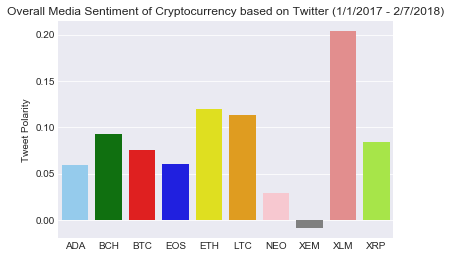

In [17]:
sentiment_plot = sns.barplot(data=avg_sentiment, palette=colors, x="symbol", y="compound_average")

plt.title("Overall Media Sentiment of Cryptocurrency based on Twitter (1/1/2017 - 2/7/2018)")
plt.xlabel("")
plt.ylabel("Tweet Polarity")

plt.show()
plt.gcf().clear()